# Customer Churn Prediction Analyisis Project

#### Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### Upload data

In [5]:
data = pd.read_excel('Telco_customer_churn.xlsx')

In [6]:
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [7]:
data.shape

(7043, 33)

In [8]:
data.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [9]:
data['Churn Reason'].unique

<bound method Series.unique of 0        Competitor made better offer
1                               Moved
2                               Moved
3                               Moved
4       Competitor had better devices
                    ...              
7038                              NaN
7039                              NaN
7040                              NaN
7041                              NaN
7042                              NaN
Name: Churn Reason, Length: 7043, dtype: object>

In [10]:
data['Churn Reason'] = data['Churn Reason'].fillna('Not Mentioned Reason')

In [11]:
data.isnull().sum()

CustomerID           0
Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
Churn Reason         0
dtype: int64

In [12]:
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [13]:
data['CustomerID'].unique()

array(['3668-QPYBK', '9237-HQITU', '9305-CDSKC', ..., '2234-XADUH',
       '4801-JZAZL', '3186-AJIEK'], dtype=object)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [15]:
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors = 'coerce')
data['Senior Citizen'] = data['Senior Citizen'].map({0: "No", 1: "Yes"})

data.drop_duplicates(inplace=True)
#data.drop(columns=['customerID'], inplace=True)
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


### Churn Distrubution Chart

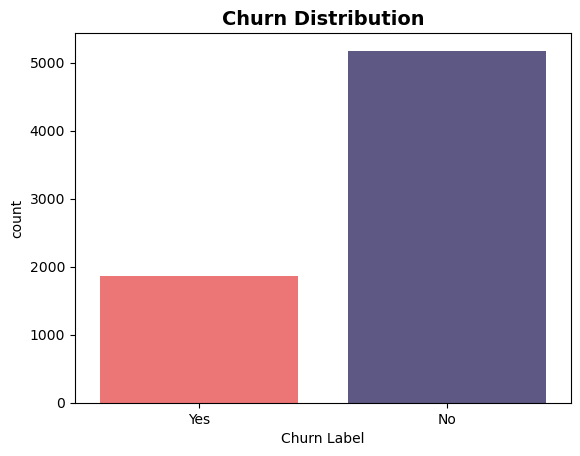

In [17]:
## Countplot for churn (Yes/No)

sns.countplot(x=data['Churn Label'],palette = {'Yes':'#ff6361','No':'#58508d'})
plt.title('Churn Distribution', fontsize=14, fontweight='bold')
plt.savefig('churn_dist.png')
plt.show()

This Bar Chart Shows the distribution of customer churned, where the ***majority of customers (arount 5000+) have not churned.*** ***while a smaller portion (around 2000) have churned.*** This indicates an imbalanced dataset which may impact churn prediction model.

### Percentage of How Many Customer Churned

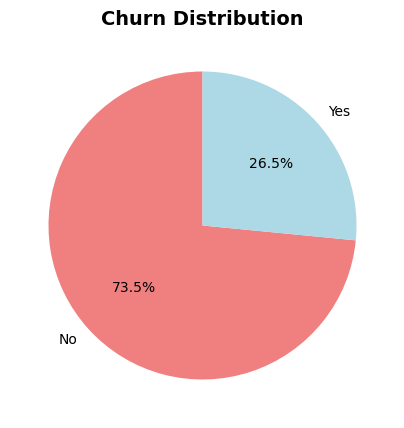

In [20]:
if "Churn Label" in data.columns:
    churn_counts = data["Churn Label"].value_counts()

    # Plot pie chart
    fig = plt.figure(figsize=(5, 5))
    plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=["lightcoral", "lightblue"])
    plt.title("Churn Distribution", fontsize=14, fontweight='bold')
    plt.savefig('percent_churned.png')
    plt.show()
else:
    print("Error: 'Churn Label' column not found in dataset.")


This Pie Chart shows that ***26.5% of customers churned*** on otherside ***73.5% customers does not churned.*** 

### Customer Tenure Analysis

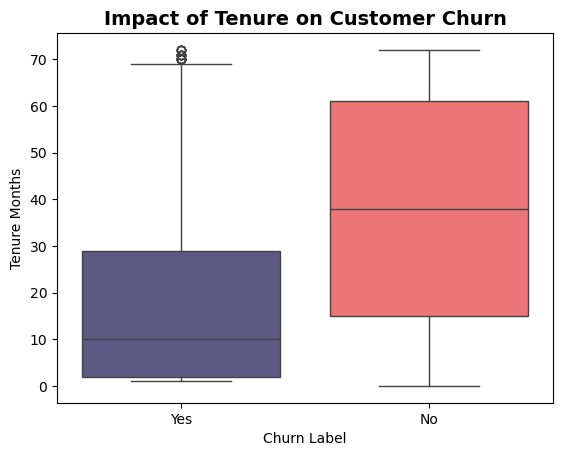

In [23]:
# Does tenure affect Churn?

sns.boxplot(x="Churn Label", y="Tenure Months", data=data, palette={'Yes': '#58508d', 'No': '#ff6361'})
plt.title("Impact of Tenure on Customer Churn", fontsize=14, fontweight='bold')
plt.savefig('tenure_affect.png')
plt.show()

The boxplot indicates that ***customers who churn tend to have shorter tenures compared to those who stay.*** The median tenure for churned customers is significantly lower, suggesting that newer customers are more likely to churn, while long-term customers are more likely to stay.

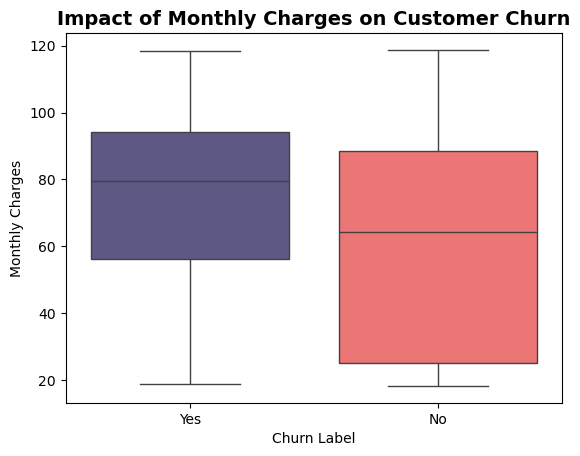

In [25]:
## Monthly Charges & Total Charges 

sns.boxplot(x="Churn Label", y="Monthly Charges", data=data,  palette={'Yes': '#58508d', 'No': '#ff6361'})
plt.title("Impact of Monthly Charges on Customer Churn", fontsize=14, fontweight='bold')
plt.savefig('monthlycharges.png')
plt.show()

The boxplot shows that ***customers who churn tend to have higher median monthly charges compared to those who stay.*** This suggests that higher monthly costs may be a contributing factor to churn, possibly due to affordability concerns.

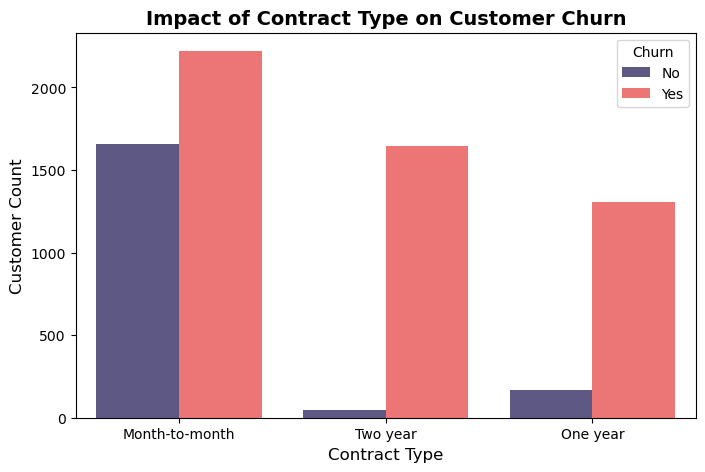

In [27]:
# Create the bar plot
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x="Contract", hue="Churn Label",palette={'Yes': '#58508d', 'No': '#ff6361'})

# Customize labels and title
plt.xlabel("Contract Type", fontsize=12)
plt.ylabel("Customer Count", fontsize=12)
plt.title("Impact of Contract Type on Customer Churn", fontsize=14, fontweight = 'bold')
plt.legend(title="Churn", labels=["No", "Yes"])
plt.savefig('contract_type.png')
# Show the plot
plt.show()

***Month-to-month contracts have the highest churn  → More than 2,000 churned customers.***

One-year and two-year contracts have significantly lower churn  → Long-term commitments improve retention.

Key Findings:
* Short-term contracts lead to higher churn as customers can leave easily.
* Long-term contracts encourage stability and lower churn rates.

### Customer Churn rate According to Services

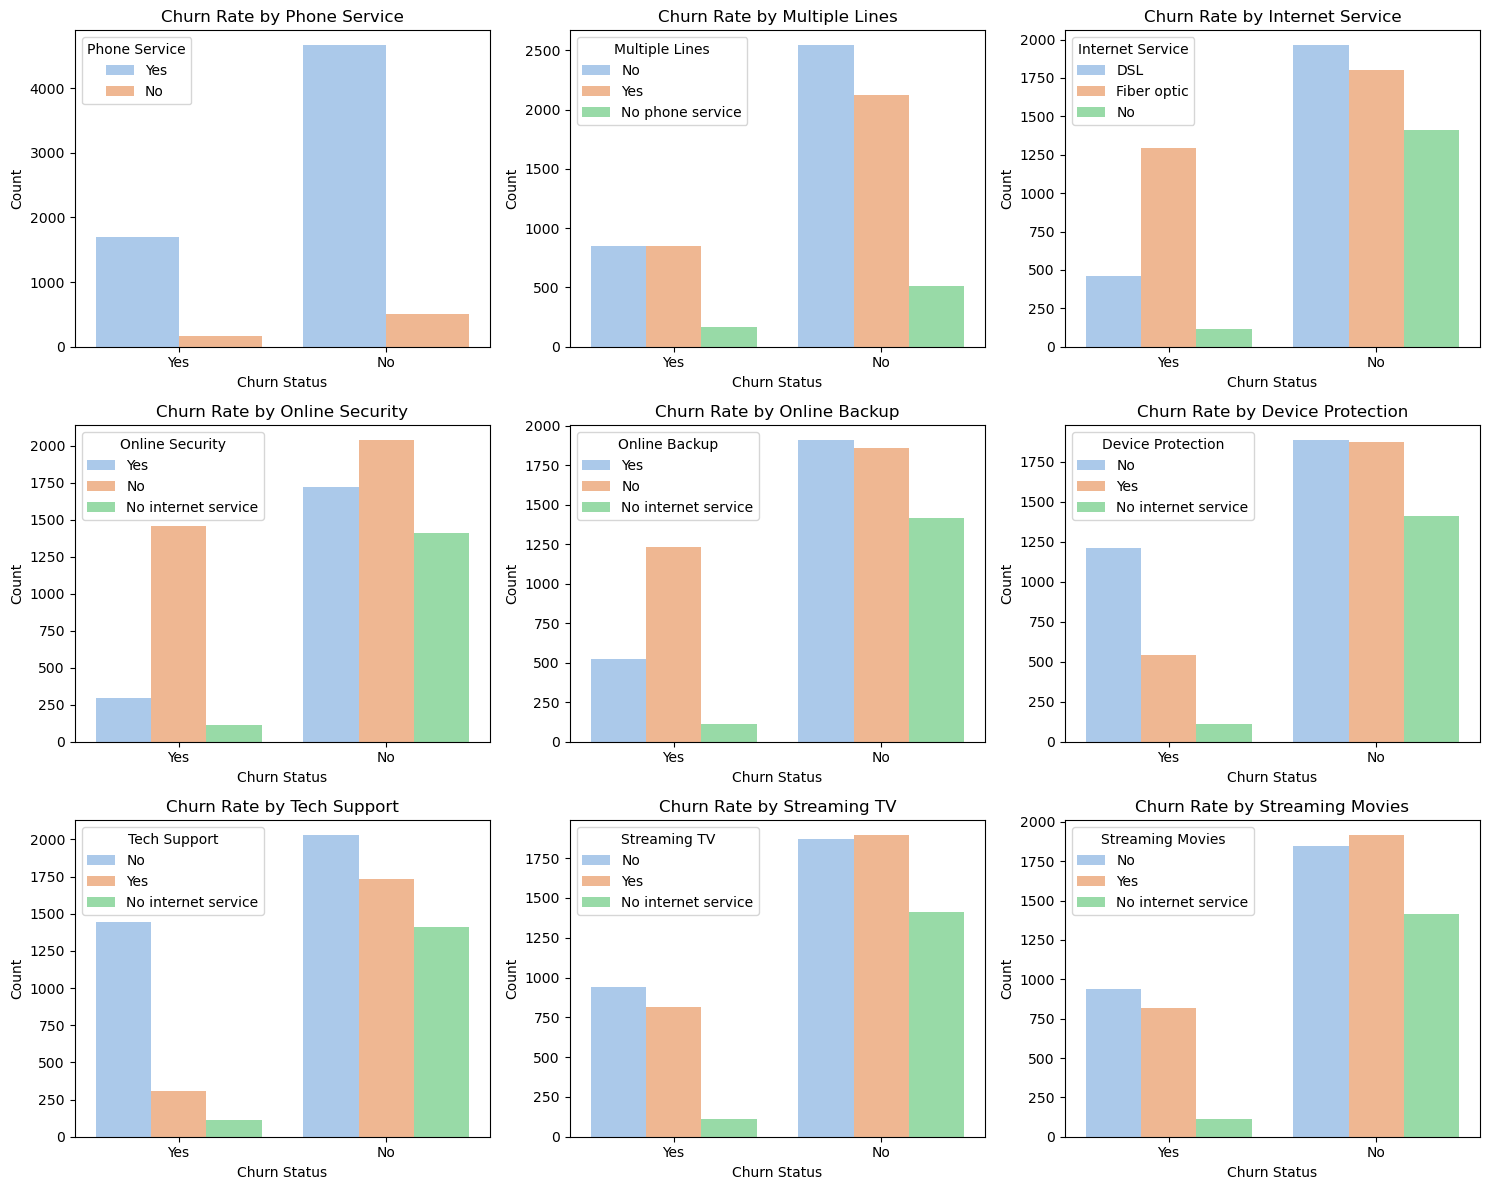

In [30]:
services = ["Phone Service", "Multiple Lines", "Internet Service", "Online Security", 
            "Online Backup", "Device Protection", "Tech Support", "Streaming TV", "Streaming Movies"]

plt.figure(figsize=(15, 12))

for i, service in enumerate(services, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x="Churn Label", hue=service, data=data, palette="pastel")  
    plt.title(f"Churn Rate by {service}")
    plt.xlabel("Churn Status")
    plt.ylabel("Count")

plt.tight_layout()
plt.savefig('service_impact.png')
plt.show()


* **Phone Service:** Customers with phone service are more likely to stay, while those without it have a lower count overall but still show some churn.

* **Multiple Lines:** Churn appears to be relatively balanced between those with and without multiple lines, though customers without multiple lines tend to stay more.

* **Internet Service:** Fiber optic users have a higher churn rate compared to DSL and those without internet service, indicating that fiber optic plans might have higher dissatisfaction or pricing issues.

* **Online Security:** Customers without online security have a higher churn rate than those with it, suggesting that security features may contribute to retention.

* **Online Backup:** A similar pattern is observed—customers without online backup churn more often compared to those with the service.

* **Device Protection:** Customers lacking device protection are more likely to churn, indicating that offering protection services might help improve retention.

* **Tech support:** has a clear impact on reducing churn.

* **Streaming services (TV & movies)** do not significantly affect churn, meaning these services may not be a strong retention factor.

### Statistical Significance (Chi-Square Test) for impact of services

In [33]:
# import scipy library

from scipy.stats import chi2_contingency

for service in services:
    contingency_table = pd.crosstab(data[service], data['Churn Label'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{service}: p-value = {p : 4f}")


Phone Service: p-value =  0.338783
Multiple Lines: p-value =  0.003464
Internet Service: p-value =  0.000000
Online Security: p-value =  0.000000
Online Backup: p-value =  0.000000
Device Protection: p-value =  0.000000
Tech Support: p-value =  0.000000
Streaming TV: p-value =  0.000000
Streaming Movies: p-value =  0.000000


**1. Phone Service (p = 0.338783)**

* The p-value is greater than 0.05, meaning there is no significant relationship between having phone service and churn.

**2. Multiple Lines (p = 0.003464)**

* Since p < 0.05, there is a statistically significant relationship between having multiple lines and churn.

**3. Internet Service, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, Streaming Movies (p = 0.000000)**

* All these services have extremely low p-values, indicating a highly significant relationship with churn.

* This means that having or not having these services strongly affects customer churn.

### Payment Method Influence

Text(0.5, 1.0, 'Payment Method Impact On Customer Churn')

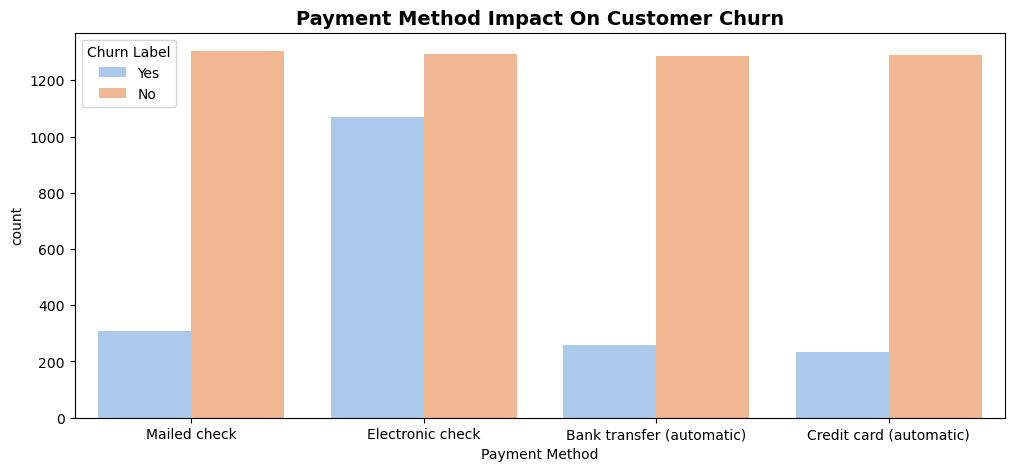

In [36]:
# does payment type affect churn?
plt.figure(figsize=(12, 5))
sns.countplot(x = 'Payment Method', hue="Churn Label", data=data, palette="pastel" )
plt.title('Payment Method Impact On Customer Churn', fontsize=14, fontweight= 'bold')

Customers using ***electronic checks have the highest churn rate,*** while those with ***automatic payments (bank transfer & credit card) churn the least.*** Encouraging ***automatic payments*** could help improve retention.

### Customer Behavior Analysis

#### Identify key reasons why customers churn.

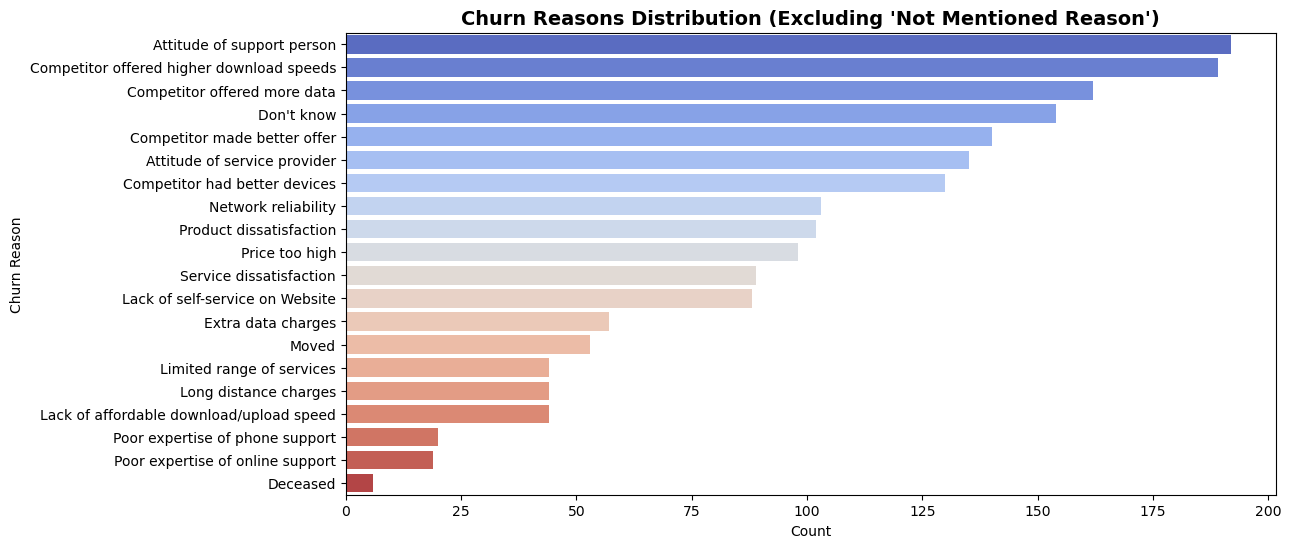

In [39]:
#Analyze Churn Reason

# Filter out 'Not Mentioned Reason'
filtered_data = data[data["Churn Reason"] != "Not Mentioned Reason"]

# Count churn reasons
reason_counts = filtered_data["Churn Reason"].value_counts()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(y=reason_counts.index, x=reason_counts.values, palette="coolwarm")

plt.xlabel("Count")
plt.ylabel("Churn Reason")
plt.title("Churn Reasons Distribution (Excluding 'Not Mentioned Reason')", fontsize = 14, fontweight = 'bold')
plt.savefig('churn_reason.png')
plt.show()

The chart highlights key churn reasons, with ***support service attitude*** and ***competitor offers (higher speeds, more data)*** being the top factors. ****Network reliability, pricing, and service dissatisfaction*** also contribute significantly. Improving ***customer support and competitive pricing can help reduce churn***.

### Hypothesis Testing

### Chi-Square Test (Categorial Features)

In [42]:
from scipy.stats import chi2_contingency
import pandas as pd

services = ["Phone Service", "Multiple Lines", "Internet Service", "Online Security", 
            "Online Backup", "Device Protection", "Tech Support", "Streaming TV", "Streaming Movies"]

for service in services:
    table = pd.crosstab(data[service], data["Churn Label"])
    chi2, p, dof, expected = chi2_contingency(table)
    print(f"{service}: p-value = {p:.6f}")  


Phone Service: p-value = 0.338783
Multiple Lines: p-value = 0.003464
Internet Service: p-value = 0.000000
Online Security: p-value = 0.000000
Online Backup: p-value = 0.000000
Device Protection: p-value = 0.000000
Tech Support: p-value = 0.000000
Streaming TV: p-value = 0.000000
Streaming Movies: p-value = 0.000000


**1. Phone Service (p = 0.338783)** → No significant impact on churn.

**2. Multiple Lines (p = 0.003464)** → Significant impact, meaning having multiple lines influences churn.

**3. Internet Service & All Internet-Based Features (p = 0.000000)** → Highly significant impact on churn.

Online Security, Backup, Device Protection, Tech Support, Streaming TV & Movies all strongly affect churn, indicating that customers' engagement with these services influences their retention.

### T-Test For (Numercial Features)

In [45]:
from scipy.stats import ttest_ind

churn_yes = data[data["Churn Label"] == "Yes"]["Monthly Charges"]
churn_no = data[data["Churn Label"] == "No"]["Monthly Charges"]
t_stat, p_value = ttest_ind(churn_yes, churn_no)
print(f"T-Test P-Value: {p_value}")

T-Test P-Value: 2.7066456068884154e-60


**P-Value: 2.71e-60 (Extremely Low) → Strong evidence that Monthly Charges significantly impact churn.**
Customers who churn tend to have higher Monthly Charges compared to those who stay.

In [47]:
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     0 non-null      object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [49]:
drop_cols = [
    'CustomerID',        # ID column
    'Lat Long',          # redundant, already have Lat/Long
    'Senior Citizen',    # all null
    'Churn Label',       # target
    'Churn Value',       # derived from target
    'Churn Score',       # post-churn metric
    'CLTV',              # lifetime value, could be post-churn
    'Churn Reason'       # causes data leakage
]
x = data.drop(columns = drop_cols, errors='ignore')
y = data['Churn Label'].map({'No': 0, 'Yes': 1})

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [50]:
# identify types on training data only

numeric_features = x_train.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features = x_train.select_dtypes(include=['object']).columns.tolist()


In [51]:
# Preprocessing Pipelines

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

#combine transformations
preprocessor = ColumnTransformer(transformers = [
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [52]:
# final pipeline

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

#train the pipeline
pipeline.fit(x_train,y_train)

#evalute
y_pred = pipeline.predict(x_test)
y_proba = pipeline.predict_proba(x_test)[:,1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("classification report")
print(classification_report(y_test, y_pred))

print(f"\nROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

Confusion Matrix:
[[760 249]
 [ 90 310]]
classification report
              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1009
           1       0.55      0.78      0.65       400

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409


ROC AUC Score: 0.8466


In [53]:
# MAE
mae = mean_absolute_error(y_test, y_proba)

#MSE
mse = mean_squared_error(y_test, y_proba)

#RMSE
rmse = np.sqrt(mse)

# r2 score
r2 = r2_score(y_test, y_proba)

# adjusted r2 score
n = len(y_test)
k = x_test.shape[1]
adjusted_r2 = 1-(1-r2) * ((n-1)/(n-k-1))

#print results
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Adjusted R² Score: {adjusted_r2:.4f}")

MAE: 0.2982
MSE: 0.1594
RMSE: 0.3993
R² Score: 0.2158
Adjusted R² Score: 0.2017


In [54]:
from sklearn.ensemble import RandomForestClassifier

# Modify the final pipeline to use RandomForestClassifier
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
])

# Train the pipeline with Random Forest
pipeline_rf.fit(x_train, y_train)

# Evaluate
y_pred_rf = pipeline_rf.predict(x_test)
y_proba_rf = pipeline_rf.predict_proba(x_test)[:, 1]

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# ROC AUC Score
print(f"\nROC AUC Score: {roc_auc_score(y_test, y_proba_rf):.4f}")

Confusion Matrix:
[[923  86]
 [194 206]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1009
           1       0.71      0.52      0.60       400

    accuracy                           0.80      1409
   macro avg       0.77      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409


ROC AUC Score: 0.8494


In [55]:
# MAE
mae = mean_absolute_error(y_pred_rf, y_proba_rf)

#MSE
mse = mean_squared_error(y_pred_rf, y_proba_rf)

#RMSE
rmse = np.sqrt(mse)

# r2 score
r2 = r2_score(y_pred_rf, y_proba_rf)

# adjusted r2 score
n = len(y_test)
k = x_test.shape[1]
adjusted_r2 = 1-(1-r2) * ((n-1)/(n-k-1))

#print results
print(f"MAE_rf: {mae:.4f}")
print(f"MSE_rf: {mse:.4f}")
print(f"RMSE_rf: {rmse:.4f}")
print(f"R² Score_rf: {r2:.4f}")
print(f"Adjusted R² Score_rf: {adjusted_r2:.4f}")

MAE_rf: 0.1959
MSE_rf: 0.0623
RMSE_rf: 0.2496
R² Score_rf: 0.6208
Adjusted R² Score_rf: 0.6139


<b>Random Forest is the better fit overall, because:</b>
Higher R² and lower error in regression tasks.

More robust and non-linear — can capture complex patterns Logistic Regression might miss.

Likely to outperform Logistic Regression in classification too (especially if you're using the same preprocessor pipeline).

Handles feature interactions and non-linearities better.

Works well without assuming linear relationships.

In [57]:
import pickle

# Save the trained pipeline to a file
with open('random_forest_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline_rf, file)

print("Model saved as random_forest_pipeline.pkl")


Model saved as random_forest_pipeline.pkl
